# Bank Churn using Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset.csv')
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [3]:
df.isnull().sum()

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [4]:
df.duplicated().sum()

69

In [5]:
df=df.drop_duplicates()

In [6]:
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.000000,0.000000,0.068966,58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.128205,195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,291.079505,0.564108,0.285714,350.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174959 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             174959 non-null  int64  
 1   CreditScore         174959 non-null  float64
 2   Age                 174959 non-null  float64
 3   Tenure              174959 non-null  float64
 4   Balance             174959 non-null  float64
 5   NumOfProducts       174959 non-null  float64
 6   HasCrCard           174959 non-null  int64  
 7   IsActiveMember      174959 non-null  int64  
 8   EstimatedSalary     174959 non-null  float64
 9   Exited              174959 non-null  int64  
 10  Surname_tfidf_0     174959 non-null  float64
 11  Surname_tfidf_1     174959 non-null  float64
 12  Surname_tfidf_2     174959 non-null  float64
 13  Surname_tfidf_3     174959 non-null  float64
 14  Surname_tfidf_4     174959 non-null  float64
 15  France              174959 non-null  in

In [8]:
df['Exited'].value_counts()

Exited
0    138006
1     36953
Name: count, dtype: int64

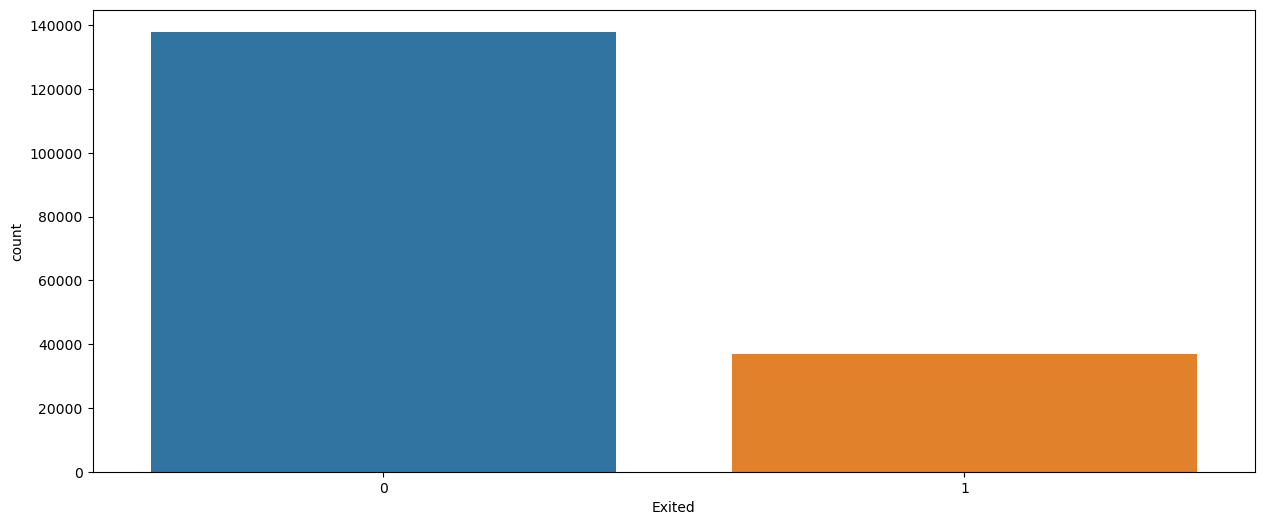

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Exited')
plt.show()

In [10]:
df.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [11]:
df=df.drop(columns=['Surname','Age','Surname_tfidf_0','Surname_tfidf_1','Surname_tfidf_2','Surname_tfidf_3','Surname_tfidf_4','Age_Tenure_product'])
df

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age
0,668.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.000000,0.000000,0.090909
1,627.0,1.0,0.00,2.0,1,1,49503.50,0,1,0,0,0,1,2.0,0.000000,0.000000,0.030303
2,678.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.000000,0.000000,0.250000
3,581.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824
4,716.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.000000,0.000000,0.151515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,7.0,155060.41,1.0,1,0,29179.52,0,1,0,0,0,1,0.0,3422.225727,5.314015,0.250000
175024,800.0,2.0,0.00,2.0,0,0,167773.55,0,1,0,0,1,0,0.0,0.000000,0.000000,0.068966
175025,771.0,5.0,0.00,2.0,1,0,96270.64,0,1,0,0,0,1,0.0,0.000000,0.000000,0.128205
175026,516.0,10.0,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1,1.0,291.079505,0.564108,0.285714


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
scaler= StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Model Building

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model=DecisionTreeClassifier()

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report

In [24]:
acc=accuracy_score(y_test,y_pred)
acc

0.7942101051668953

In [25]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     27605
           1       0.51      0.52      0.52      7387

    accuracy                           0.79     34992
   macro avg       0.69      0.70      0.69     34992
weighted avg       0.80      0.79      0.80     34992

